In [1]:
import requests
import matplotlib.pyplot as plt
from json import dumps
from tqdm.notebook import tqdm
from time import time
from random import choice, randint

In [9]:
waterplace_nature = [
    "rekaabakan-61btsk",
    "prudalekseevskij-pielkk",
    "rekaamga-dgw4yf",
    "rekaamur-lyo85y",
    "rekaangara-8ua3ib"
]
regions = [
    "moskovskaya-oblast-rdrelj",
    "respublika-yakutiya-4iwaa9",
    "zabajkalskij-kraj-5dkvks",
    "evrejskaya-avtonomnaya-oblast-1a1d15",
    "amurskaya-oblast-emf91p",
    "habarovskij-kraj-40ee3o",
    "irkutskaya-oblast-ej45de",
    "krasnoyarskij-kraj-29cawg"
]
title = 'Тестовый отчет №{}'
date_start = '2021-04-08T21:00:00Z'
date_end = '2021-04-08T21:00:00Z'
content = 'Контент отчета, бла бла бла'
fish_report = "[{\"id\":\"fish0\",\"body\":{\"id\":\"fish0\",\"name\":\"Окунь\",\"activity\":\"2\",\"weight\":\"1\",\"count\":\"22\",\"methods\":\"Спиннинг\",\"moreEffectiveTips\":\"\",\"activityHours\":\"\",\"horizons\":\"\",\"depths\":\"\"}},{\"id\":\"fish1\",\"body\":{\"id\":\"fish1\",\"name\":\"Щука\",\"activity\":\"6\",\"weight\":\"3\",\"count\":\"2\",\"methods\":\"Спиннинг\",\"moreEffectiveTips\":\"\",\"activityHours\":\"\",\"horizons\":\"\",\"depths\":\"\"}}]"
coordinates = '8 800 555 35 35'
tags = "[\"Тест\"]"
city = "Москва"

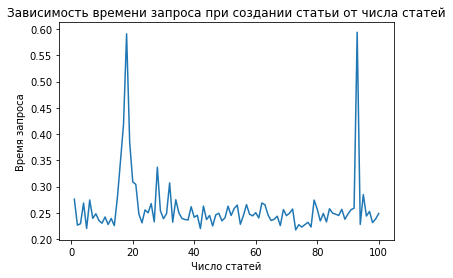

In [12]:
times = []
num = 100
for i in tqdm(range(num)):
    st = time()
    data = {
        'waterplace_nature': [choice(waterplace_nature)],
        'waterplace_cost': [],
        'region': [choice(regions)],
        'title': title.format(i),
        'date_start': date_start,
        'date_end': date_end,
        'content': content,
        'fishing_report': fish_report,
        'coordinates': coordinates,
        'tags': tags,
        'city': city,
        'category': 'report'
    }
    r = requests.post('https://back.fishow.ru/api/report/', json=data, auth=('test_{}'.format(randint(1, 50)), '081099asd'))
    times.append(time() - st)
    if r.status_code != 201:
        print(r.content)
        print('Error during creating blog: {}'.format(i))
        break
if len(times) == 100:
    plt.plot(list(range(1, 101)), times)
    plt.title("Зависимость времени запроса при создании статьи от числа статей")
    plt.xlabel("Число статей")
    plt.ylabel("Время запроса")
    plt.show()